## **who is going to quit ?**
**In this project, we will project employees who are likely to be terminated based on a set of features**


*  Employee Name : Employee’s full name
*   EmpID : Employee ID is unique to each employee



*   MarriedID : Is the person married (1 or 0 for yes or no)
*   MaritalStatusID : Marital status code that matches the text field MaritalDesc

*   EmpStatusID : Employment status code that matches text field EmploymentStatus

*  DeptID : Department ID code that matches the department the employee works in
*   PerfScoreID : Performance Score code that matches the employee’s most 

recent performance score


*   FromDiversityJobFairID : Was the employee sourced from the Diversity job fair? 1 or 0 for yes or no



*   PayRate : The person’s hourly pay rate. All salaries are converted to hourly pay rate

*   Termd : Has this employee been terminated - 1 or 0
*  PositionID : An integer indicating the person’s position


*   Position : The text name/title of the position the person has

*   State : The state that the person lives in
*  Zip : The zip code for the employee



*  DOB : Date of Birth for the employee
*   Sex : Sex - M or F


*  MaritalDesc : The marital status of the person (divorced, single, widowed, separated, etc)
*   CitizenDesc : Label for whether the person is a Citizen or Eligible NonCitizen


*   HispanicLatino : Yes or No field for whether the employee is Hispanic/Latino
*  RaceDesc : Description/text of the race the person identifies with



* DateofHire : Date the person was hired

*   DateofTermination : Date the person was terminated, only populated if, in fact, Termd = 1

*   TermReason : A text reason / description for why the person was terminated
*  EmploymentStatus : A description/category of the person’s employment status. Anyone currently working full time = Active


*   Department : Name of the department that the person works in


* ManagerName : The name of the person’s immediate manager


*  ManagerID : A unique identifier for each manager.

*   RecruitmentSource : The name of the recruitment source where the employee was recruited from

*   
PerformanceScore : Performance Score text/category (Fully Meets, Partially Meets, PIP, Exceeds)

*   EngagementSurvey : Results from the last engagement survey, managed by our external partner
*  EmpSatisfaction : A basic satisfaction score between 1 and 5, as reported on a recent employee satisfaction survey


*  SpecialProjectsCount : The number of special projects that the employee worked on during the last 6 months


*   LastPerformanceReviewDate : The most recent date of the person’s last performance review.


*   DaysLateLast30 : The number of times that the employee was late to work during the last 30 days

**And we will answer some questions :**




*   Is there any relationship between who a person works for and their performance score?


*   What are our best recruiting sources if we want to ensure a diverse organization?


*  Are there areas of the company where pay is not equitable?



*  What is the overall diversity profile of the organization ?




### **Importing Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn import preprocessing
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

### **Load & Read Data**

In [2]:
#Lets load the dataset and sample some
# loading the dataset to pandas dataframe
data = pd.read_csv("/content/HRDataset_v14.csv")
# Success
print("Stroke dataset has {} data points with {} variables each.".format(*data.shape))

Stroke dataset has 311 data points with 36 variables each.


In [3]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
data.tail()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,...,David Stanley,14.0,LinkedIn,Fully Meets,4.50,5,0,1/30/2019,0,2


### **Exploatroy Data Analysis & Visulazation**

In [5]:
#checking the number of rows and columns in dataframe 
print(data.shape)

(311, 36)


In [6]:
#check missing values
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco



*   We only have NULL values in "DateofTermination" & "ManagerID" columns



In [7]:
# Count the number of unique values in each column
num_unique = data.nunique()

# Print the results
print(num_unique)

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [8]:
# Get information about DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [9]:
# statistical measure of dataset
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [10]:
# How many manager in company
print(len(data['ManagerName'].unique()), "managers are currently working in the company :", data['ManagerName'].unique())

21 managers are currently working in the company : ['Michael Albert' 'Simon Roup' 'Kissy Sullivan' 'Elijiah Gray'
 'Webster Butler' 'Amy Dunn' 'Alex Sweetwater' 'Ketsia Liebig'
 'Brannon Miller' 'Peter Monroe' 'David Stanley' 'Kelley Spirea'
 'Brandon R. LeBlanc' 'Janet King' 'John Smith' 'Jennifer Zamora'
 'Lynn Daneault' 'Eric Dougall' 'Debra Houlihan' 'Brian Champaigne'
 'Board of Directors']


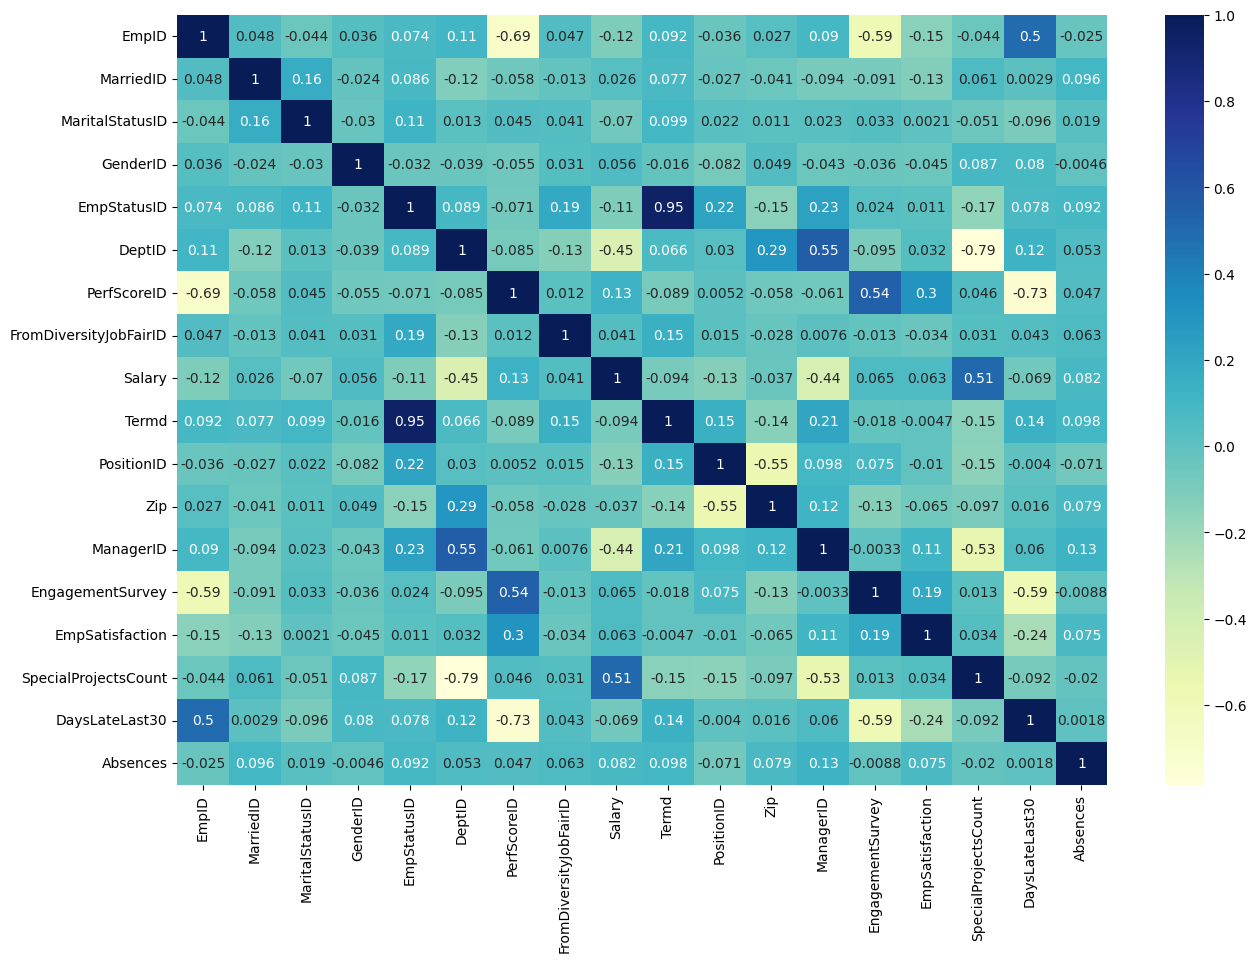

In [11]:
# check correlation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True)
plt.show()

**Is there any relationship between who a person works for and their performance score?**

In [12]:
# get the unique values in PerformanceScore feature
data['PerformanceScore'].unique()

array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

<Figure size 1000x500 with 0 Axes>

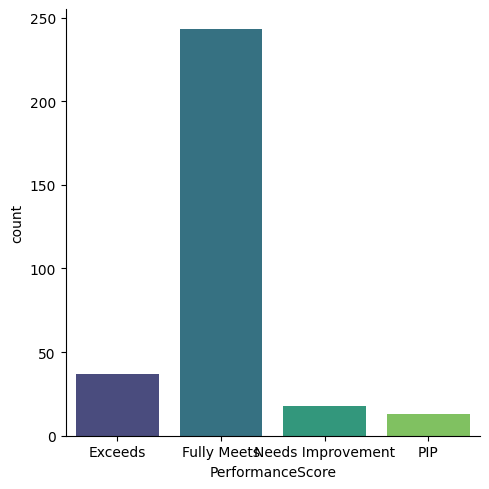

In [13]:
# PerformanceScore distributed in the dataset 
plt.figure(figsize=(10,5))
sns.catplot(x='PerformanceScore', data=data, kind="count",palette='viridis')
plt.show()

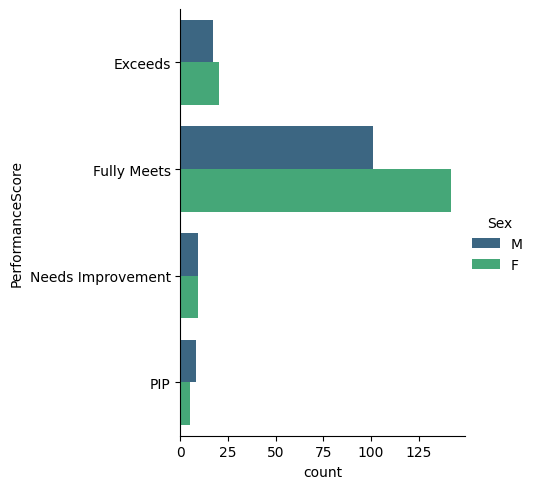

In [14]:
sns.catplot(y='PerformanceScore', hue='Sex', data=data, kind="count",palette='viridis')
plt.show()

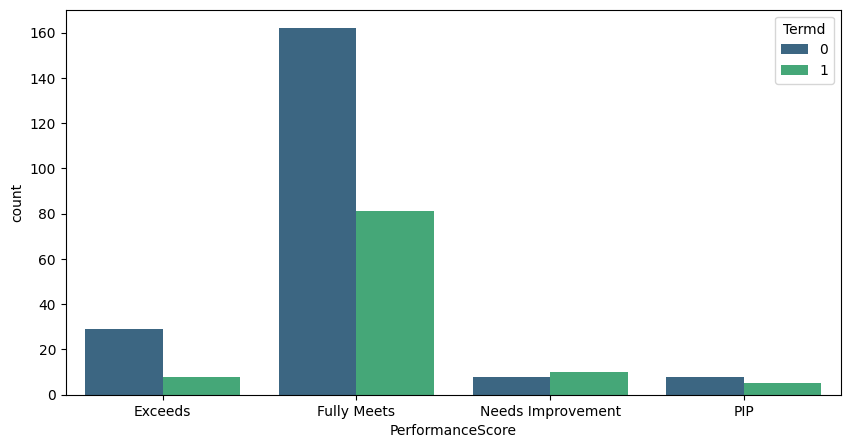

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceScore', data=data, hue = 'Termd', palette='viridis')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

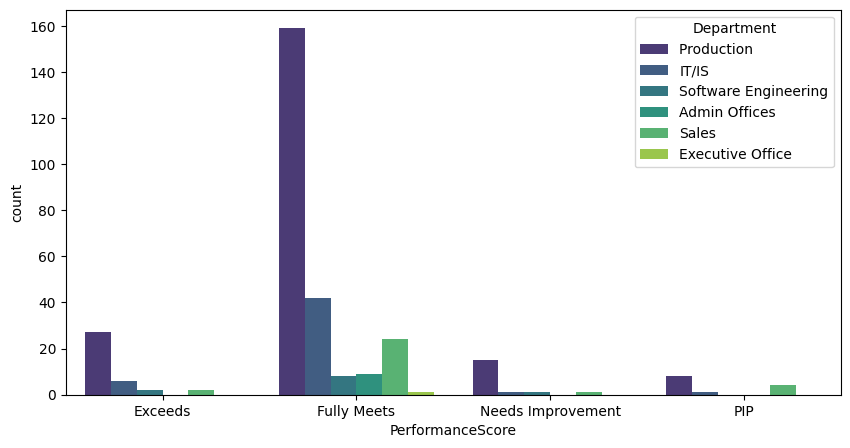

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceScore', data=data, hue = 'Department', palette='viridis')
plt.show

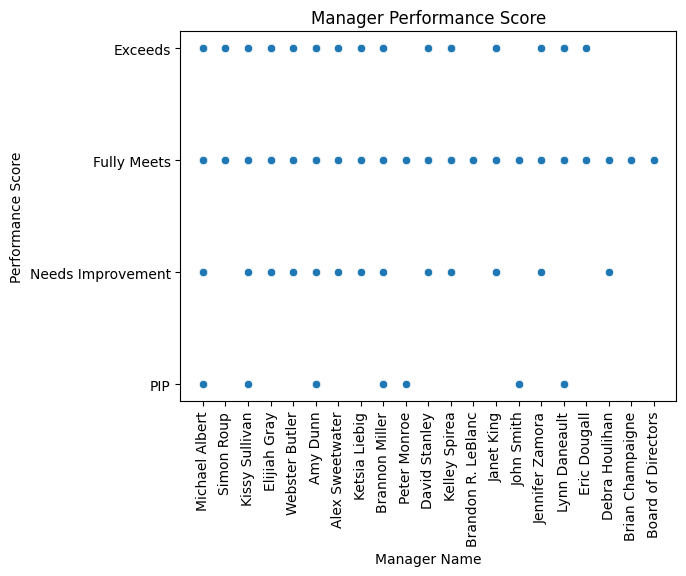

In [17]:
sns.scatterplot(data=data, x='ManagerName', y='PerformanceScore')
plt.xticks(rotation=90)
plt.title('Manager Performance Score')
plt.xlabel('Manager Name')
plt.ylabel('Performance Score')
plt.show()



*  All the managers have employees that scores "Fully Meet" so no correlation between the manager and performance



**let's know who have the most productive employees**

In [18]:
# Group HR data by manager name and performance score
hr_performance = data.groupby('ManagerName')['PerformanceScore'].value_counts().unstack()

# Print the resulting table
print(hr_performance)

PerformanceScore    Exceeds  Fully Meets  Needs Improvement  PIP
ManagerName                                                     
Alex Sweetwater         2.0          6.0                1.0  NaN
Amy Dunn                3.0         15.0                1.0  2.0
Board of Directors      NaN          2.0                NaN  NaN
Brandon R. LeBlanc      NaN          7.0                NaN  NaN
Brannon Miller          7.0         10.0                1.0  4.0
Brian Champaigne        NaN          8.0                NaN  NaN
David Stanley           1.0         19.0                1.0  NaN
Debra Houlihan          NaN          2.0                1.0  NaN
Elijiah Gray            2.0         18.0                2.0  NaN
Eric Dougall            1.0          3.0                NaN  NaN
Janet King              4.0         13.0                2.0  NaN
Jennifer Zamora         2.0          4.0                1.0  NaN
John Smith              NaN         12.0                NaN  2.0
Kelley Spirea           3

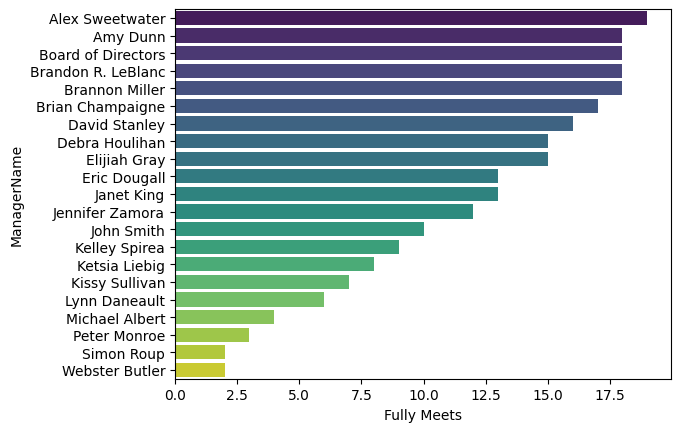

In [19]:
sns.barplot(data = hr_performance.sort_values("Fully Meets", ascending = False),x = "Fully Meets", y = hr_performance.index,palette='viridis')
plt.show()

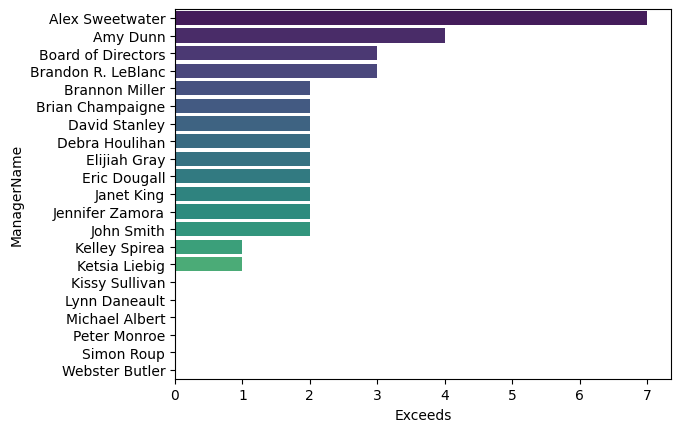

In [20]:
sns.barplot(data = hr_performance.sort_values('Exceeds', ascending = False),x = 'Exceeds', y = hr_performance.index,palette='viridis')
plt.show()


*   Alex Sweetwater has the most productive employees




**What are our best recruiting sources if we want to ensure a productive organization?**

In [21]:
# get the unique values in PerformanceScore feature
data['RecruitmentSource'].unique()

array(['LinkedIn', 'Indeed', 'Google Search', 'Employee Referral',
       'Diversity Job Fair', 'On-line Web application', 'CareerBuilder',
       'Website', 'Other'], dtype=object)

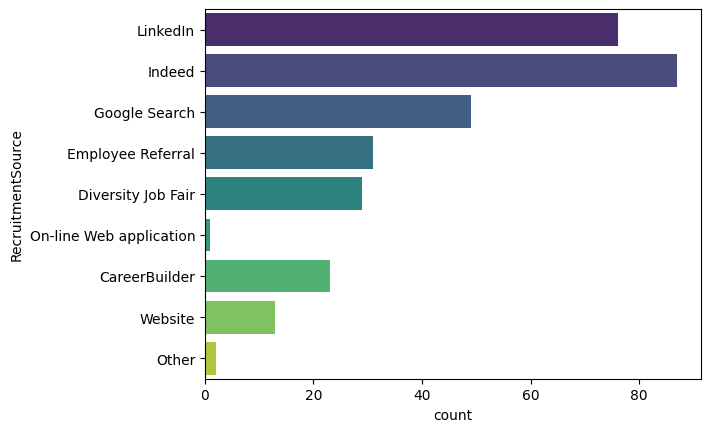

In [22]:
# PerformanceScore distributed in the dataset 
sns.countplot(y='RecruitmentSource', data=data , palette='viridis')
plt.show()

In [23]:
# group the data by RecruitmentSource and PerformanceScore
hr_source = data.groupby(['RecruitmentSource', 'PerformanceScore']).size().unstack()

# Print the resulting table
print(hr_source)

PerformanceScore         Exceeds  Fully Meets  Needs Improvement  PIP
RecruitmentSource                                                    
CareerBuilder                2.0         17.0                4.0  NaN
Diversity Job Fair           6.0         18.0                4.0  1.0
Employee Referral            5.0         25.0                NaN  1.0
Google Search                2.0         43.0                3.0  1.0
Indeed                      12.0         66.0                4.0  5.0
LinkedIn                     9.0         61.0                3.0  3.0
On-line Web application      NaN          1.0                NaN  NaN
Other                        NaN          2.0                NaN  NaN
Website                      1.0         10.0                NaN  2.0


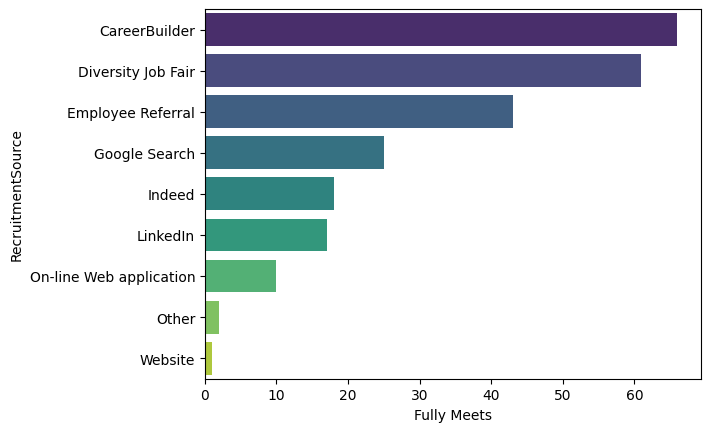

In [24]:
sns.barplot(data = hr_source.sort_values('Fully Meets', ascending = False),x = 'Fully Meets', y =  hr_source.index,palette='viridis')
plt.show()

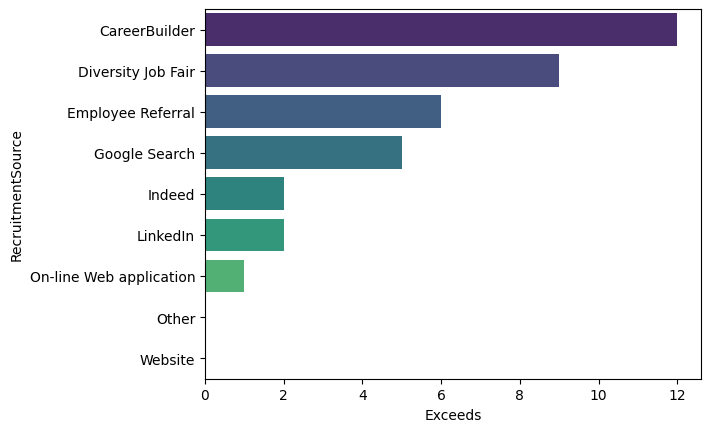

In [25]:
sns.barplot(data = hr_source.sort_values('Exceeds', ascending = False),x = 'Exceeds', y =  hr_source.index,palette='viridis')
plt.show()



*   so best recruiting sources if we want to ensure a productive organization is Career Builder and Diversity job fairs have the most productive employees



**Are there areas of the company where pay is not equitable?**

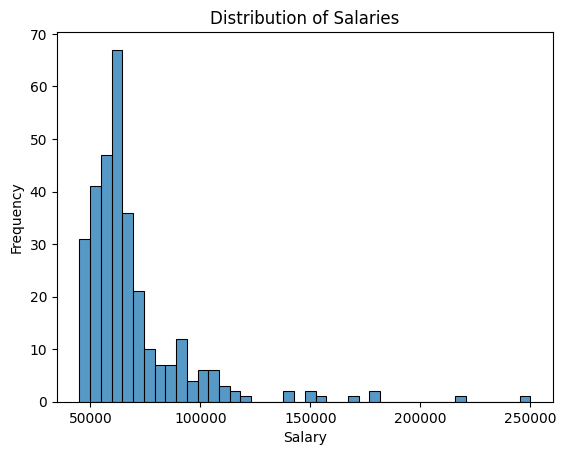

In [26]:
# plot a histogram of the 'Salary' column using seaborn
sns.histplot(data['Salary'])

# add labels and title to the plot
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')

# display the plot
plt.show()

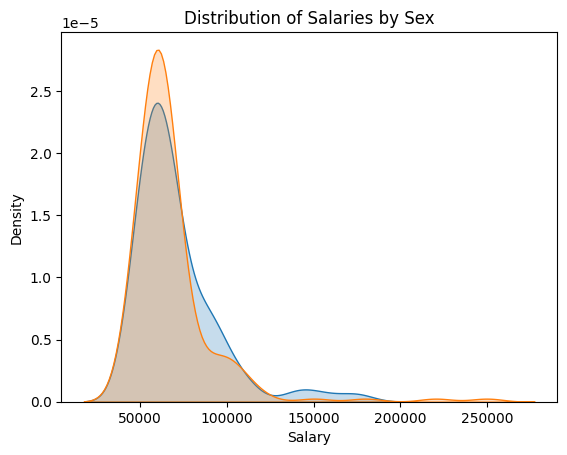

In [27]:
# filter the data by sex
Male = data[data["Sex"]=="M "]
Female= data[data["Sex"]=="F"]

# plot a kernel density estimate of the 'Salary' column for each sex
sns.kdeplot(Male["Salary"],shade=True,label="M")
sns.kdeplot(Female["Salary"],shade=True,label="F")

# add labels and a title to the plot
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Distribution of Salaries by Sex')

# display the plot
plt.show()

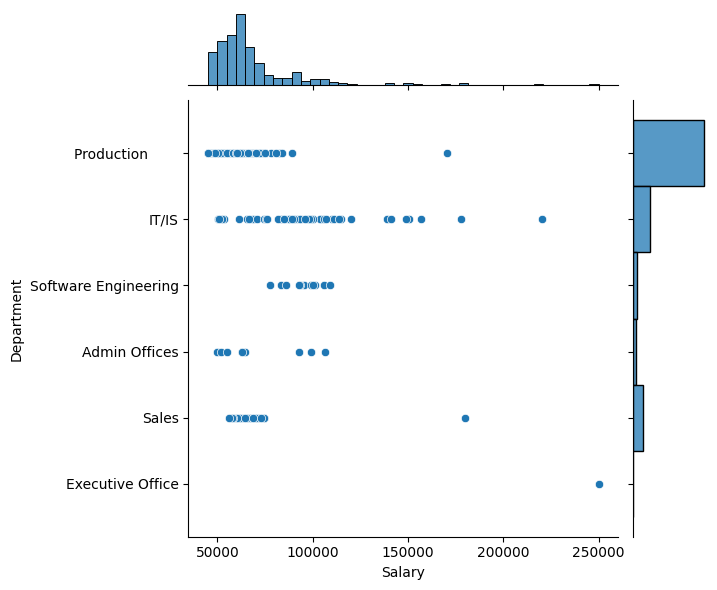

In [28]:
# Department in salary
sns.jointplot(x=data.Salary,y=data.Department)

In [29]:
# group the data by 'Department' and calculate the mean of 'Salary'
avg_sal = data.groupby('Department')['Salary'].mean().reset_index(name = 'Avg_salary')
avg_sal

,Department,Avg_salary
0,Admin Offices,71791.888889
1,Executive Office,250000.000000
2,IT/IS,97064.640000
3,Production,59953.545455
4,Sales,69061.258065
5,Software Engineering,94989.454545


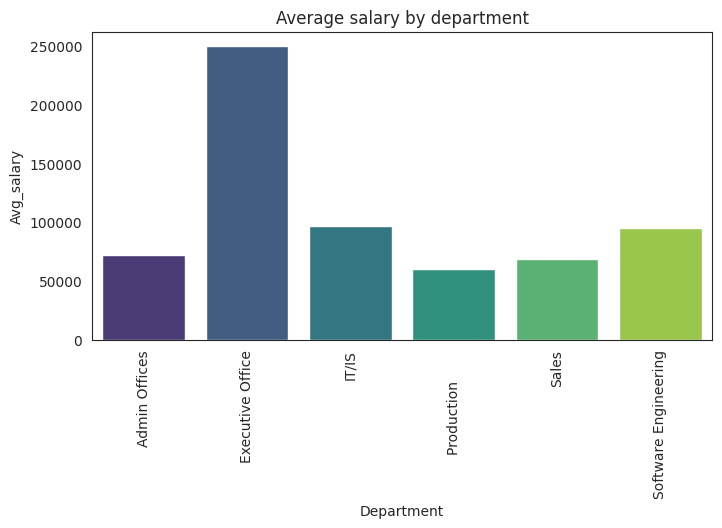

In [30]:
# Visualizing average salary by department 
sns.set_style('white')
plt.figure(figsize = (8,4))
sns.barplot(data = avg_sal, x = 'Department', y = 'Avg_salary',palette='viridis')
plt.title('Average salary by department')
plt.xticks(rotation = 90);

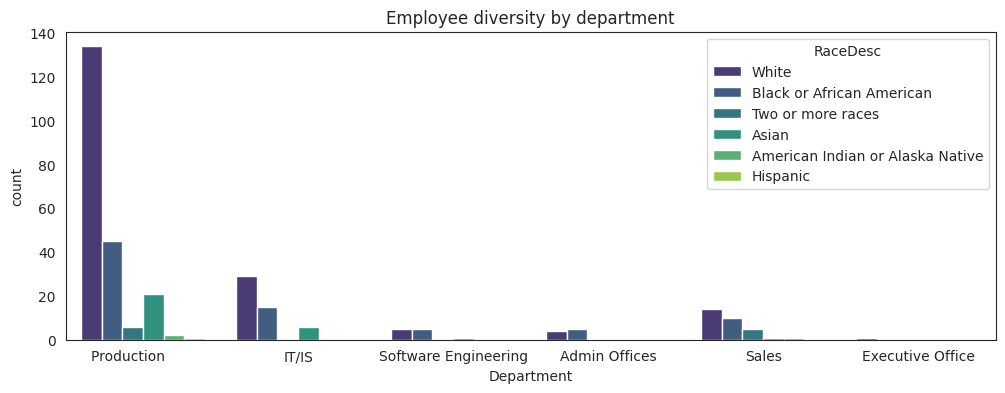

In [31]:
# Visualizing diversity in each department
plt.figure(figsize=(12,4))
sns.countplot(data, x = data['Department'], hue = data['RaceDesc'],palette='viridis')
plt.title('Employee diversity by department');
plt.show()

**What is the overall diversity profile of the organization ?**


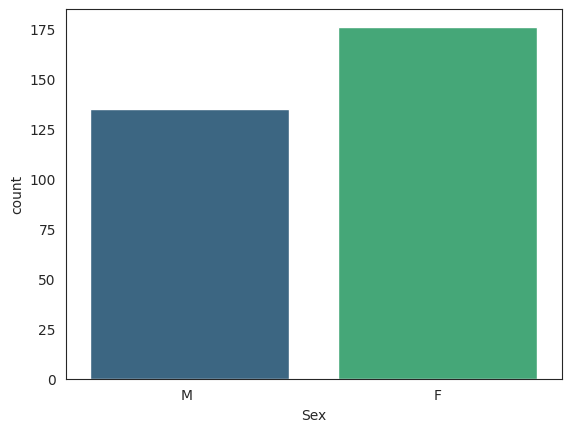

In [32]:
# Gendaer count 
sns.countplot(x=data['Sex'],palette='viridis')
plt.show()

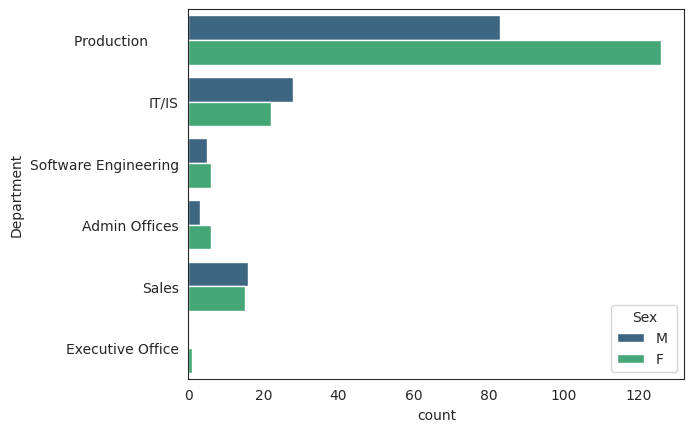

In [33]:
sns.countplot(y=data['Department'], hue=data['Sex'],palette='viridis')
plt.show()

In [34]:
# get the unique values in RaceDesc feature
data['RaceDesc'].unique()

array(['White', 'Black or African American', 'Two or more races', 'Asian',
       'American Indian or Alaska Native', 'Hispanic'], dtype=object)

In [35]:
# group the data by 'RaceDesc' and count the number of employees in each group
race_count = data['RaceDesc'].value_counts()

# sort the counts in descending order and store the race names in a separate variable
races = race_count.index

# print the race counts in descending order
print(race_count)

White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: RaceDesc, dtype: int64


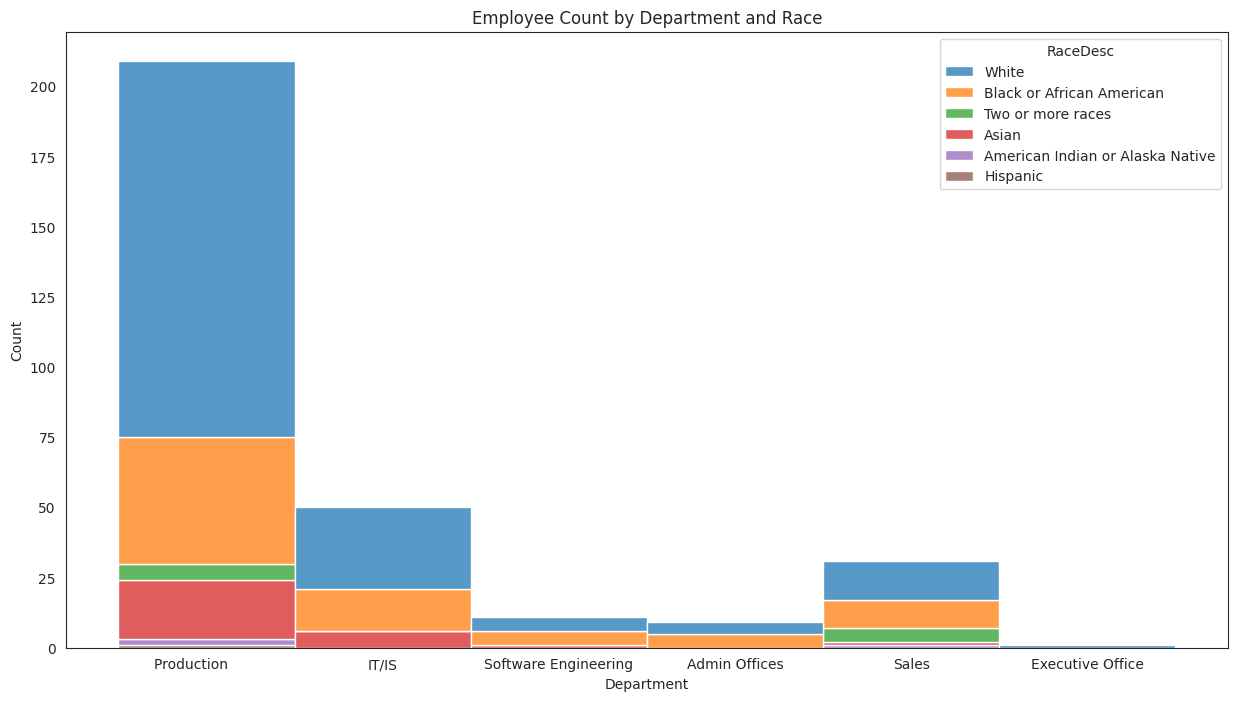

In [36]:
plt.figure(figsize=(15, 8))
# create a stacked histogram of 'Department' by 'RaceDesc'
sns.histplot(x='Department', hue='RaceDesc', multiple='stack', data=data)

# add labels and a title to the plot
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Employee Count by Department and Race')

# display the plot
plt.show()

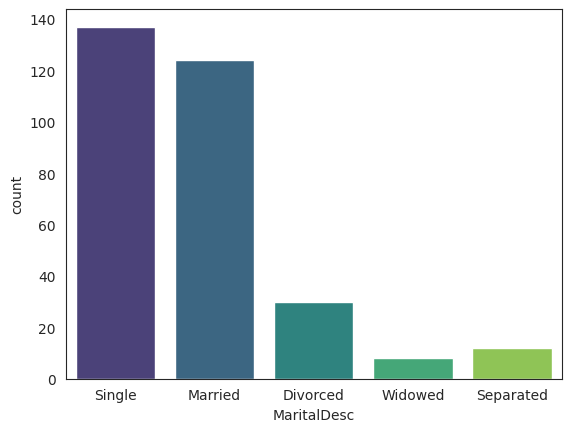

In [37]:
# Relationcount 
sns.countplot(x=data['MaritalDesc'],palette='viridis')
plt.show()

**Let's Know why they terminated from company**

In [38]:
# get the unique values in TermReason feature
data['TermReason'].unique()

array(['N/A-StillEmployed', 'career change', 'hours', 'return to school',
       'Another position', 'unhappy', 'attendance', 'performance',
       'Learned that he is a gangster', 'retiring',
       'relocation out of area', 'more money', 'military',
       'no-call, no-show', 'Fatal attraction',
       'maternity leave - did not return', 'medical issues',
       'gross misconduct'], dtype=object)

In [39]:
# group the data by 'TermReason' and count the number of employees in each group
TermReason_count = data['TermReason'].value_counts()

# sort the counts in descending order 
Term_Reason = TermReason_count.index

# print the counts in descending order
print(TermReason_count)

N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
no-call, no-show                      4
military                              4
retiring                              4
performance                           4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: TermReason, dtype: int64


In [40]:
# group the data by 'Termd' and count the number of employees in each group
Termd_count = data['Termd'].value_counts()

# sort the counts in descending order 
Termds = Termd_count.index

# print the counts in descending order
print(Termd_count)

0    207
1    104
Name: Termd, dtype: int64


### **Data Preprocessing**

In [41]:
#  select onlynecessary columns
data_select = data[['MaritalDesc','Sex', 'EmploymentStatus', 'Department', 'PerformanceScore',  'Position', 'CitizenDesc', 'HispanicLatino',
          'RaceDesc', 'ManagerName', 'RecruitmentSource', 'EmpSatisfaction', 'SpecialProjectsCount','Salary', 'DaysLateLast30', 'Absences', 'Termd']]

In [42]:
print(data_select.isnull().sum())

MaritalDesc             0
Sex                     0
EmploymentStatus        0
Department              0
PerformanceScore        0
Position                0
CitizenDesc             0
HispanicLatino          0
RaceDesc                0
ManagerName             0
RecruitmentSource       0
EmpSatisfaction         0
SpecialProjectsCount    0
Salary                  0
DaysLateLast30          0
Absences                0
Termd                   0
dtype: int64


In [43]:
print(data_select.shape)

(311, 17)


In [44]:
print(data_select.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MaritalDesc           311 non-null    object
 1   Sex                   311 non-null    object
 2   EmploymentStatus      311 non-null    object
 3   Department            311 non-null    object
 4   PerformanceScore      311 non-null    object
 5   Position              311 non-null    object
 6   CitizenDesc           311 non-null    object
 7   HispanicLatino        311 non-null    object
 8   RaceDesc              311 non-null    object
 9   ManagerName           311 non-null    object
 10  RecruitmentSource     311 non-null    object
 11  EmpSatisfaction       311 non-null    int64 
 12  SpecialProjectsCount  311 non-null    int64 
 13  Salary                311 non-null    int64 
 14  DaysLateLast30        311 non-null    int64 
 15  Absences              311 non-null    in



*   Solve Categorical Features Problem




In [45]:
# select only Categorical features
data_select.columns[:-5]

Index(['MaritalDesc', 'Sex', 'EmploymentStatus', 'Department',
       'PerformanceScore', 'Position', 'CitizenDesc', 'HispanicLatino',
       'RaceDesc', 'ManagerName', 'RecruitmentSource', 'EmpSatisfaction'],
      dtype='object')

In [46]:
# apply get dummies
df_dummies = pd.get_dummies(data_select, columns=data_select.columns[:-5], drop_first=True)
df_dummies

,SpecialProjectsCount,Salary,DaysLateLast30,Absences,Termd,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,Sex_M,...,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website,EmpSatisfaction_2,EmpSatisfaction_3,EmpSatisfaction_4,EmpSatisfaction_5
0,0,62506,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,6,104437,0,17,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,64955,0,3,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,64991,0,15,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,50825,0,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0,65893,0,13,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
307,0,48513,5,4,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
308,6,220450,0,16,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
309,5,89292,0,11,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
print(df_dummies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 93 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   SpecialProjectsCount                       311 non-null    int64
 1   Salary                                     311 non-null    int64
 2   DaysLateLast30                             311 non-null    int64
 3   Absences                                   311 non-null    int64
 4   Termd                                      311 non-null    int64
 5   MaritalDesc_Married                        311 non-null    uint8
 6   MaritalDesc_Separated                      311 non-null    uint8
 7   MaritalDesc_Single                         311 non-null    uint8
 8   MaritalDesc_Widowed                        311 non-null    uint8
 9   Sex_M                                      311 non-null    uint8
 10  EmploymentStatus_Terminated for Cause      311 non

### **Prediction**


*   Spliting Data



In [48]:
# drop the 'Termd' column from the DataFrame to create the feature matrix
X = df_dummies.drop('Termd', axis=1)
# create the target vector
y = df_dummies['Termd'] 
# split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [49]:
# check shape
print('x_train: ', X_train.shape)
print('x_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (248, 92)
x_test:  (63, 92)
y_train:  (248,)
y_test:  (63,)


In [50]:
# make a balanced dataset by using SMOTE technique.
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Fit the SMOTE object to the training data and oversample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [51]:
from sklearn.preprocessing import StandardScaler
# create an instance of the StandardScaler
scaler = StandardScaler()

# fit the scaler to the training data X_train
scaler.fit(X_train)

StandardScaler()

In [52]:
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)



*   Build Our Models 



In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [54]:
# create a dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=500),
    "XGBClassifier": XGBClassifier(n_estimators=700)
}

# loop through the models and fit each one to the training data
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

Decision Tree trained.
Random Forest trained.
XGBClassifier trained.


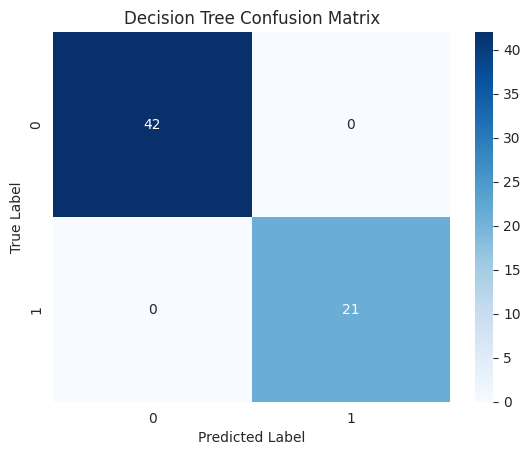

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        21

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



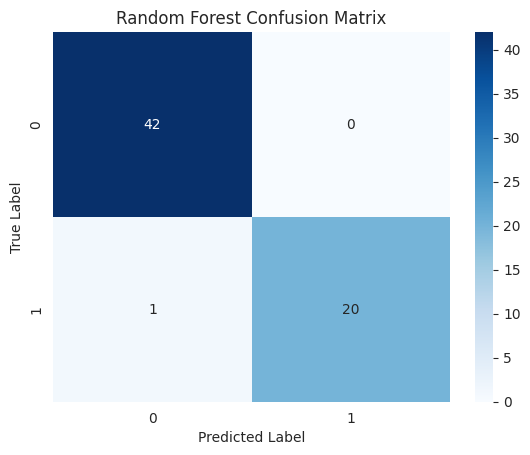

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.95      0.98        21

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



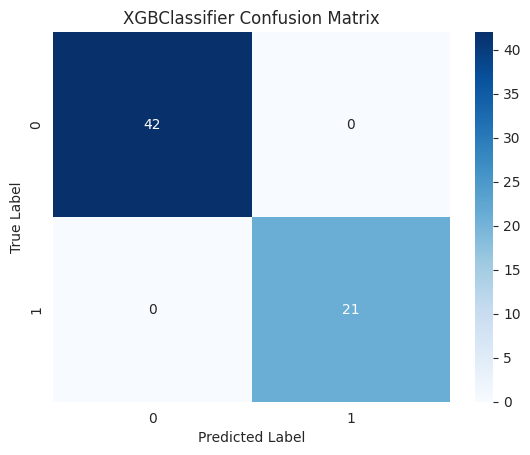

XGBClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        21

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [56]:
# loop through the models and make predictions on the test data
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    # plot the confusion matrix as a heatmap
    cm = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    ax.set_title(name + " Confusion Matrix")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    plt.show()
    
    # print the classification report for each model
    report = classification_report(y_test, y_pred)
    print(name + " Classification Report:")
    print(report)
